# Supervised learning and Linear models
I will cite external resources, Deakin resources will not be cited.

## Week 5: Fundamentals of supervised learning

### 5.1 Regression

#### 5.1.1 Concept
The information below is from the Machine Learning Specialization (Ng, A., n.d.) course.

Linear regression maps input data $\mathbf{x}$ to labelled data $\mathbf{y}$. The formula is:
$$
f_{\mathbf{w}, b}(\mathbf{x}) = \mathbf{w}\mathbf{x} + b
$$

Our goal is the find the best $w$ weights and $b$ bias. 

The cost function $J(\mathbf{w},b)$ will help use choose the best weights and bias. To find the smallest cost, we need **gradient descent**. 

Note: $\mathbf{w}$ is a vector or column matrix $\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}$ and $b$ is a scalar.

##### Gradient Descent
The cost function formula is
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})^2 = J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (\mathbf{w} \cdot \mathbf{x}^{(i)} + b - \mathbf{y}^{(i)})^2$$

where $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalar or float to support multiple features; $m$ is the number of training data.

Before I introduced to gradient descent, we need to compute the gradient, which is the final form of the partial derivative of weights and bias.
$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\mathbf{x}^{(i) \times} {\mathbf{w}} + b - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\mathbf{x}^{(i)} \times {\mathbf{w}} + b - y^{(i)})
\end{align}
$$
* $m$ is the number of training examples in the data set
* $\mathbf{w}$ is weight vector
* $\mathbf{x}^{(i)}$ and $\mathbf{y}^{(i)}$ are vectors as well

So here is the formula for gradient descent
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where $\alpha$ is the learning rate, determining how fast the gradient descent converge, or find the optimal parameters. We don't want to set it too high or too small, coz the model might not converge and converge very slowly (Ng, A., n.d.).

The following dataset is from GeeksforGeeks (2024). It is an advertising dataset where the input are the advertising budget spent on TV, radio, and newspaper; the output is sales of the product in thousands of units.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import QuantileTransformer

In [21]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [22]:
# Split the dataset
X = df.drop(['Sales'],axis=1)
Y = df['Sales']
Y = Y.to_numpy()

In [23]:
# Initialize QuantileTransformer
quantile_transformer = QuantileTransformer()

# Fit the scaling to the X
X_scaled = quantile_transformer.fit_transform(X)

c:\Users\tomde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (200). n_quantiles is set to n_samples.
  warnings.warn(


##### Init weights and bias

In [31]:
n = X_scaled.shape[1] # number of features

# Init weights and bias
w_init = np.zeros(n)
b_init = 0.0

print("Initial weights:", w_init)
print("Initial bias:", b_init) 

Initial weights: [0. 0. 0.]
Initial bias: 0.0


##### Compute the cost function
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (\mathbf{w} \cdot \mathbf{x}^{(i)} + b - \mathbf{y}^{(i)})^2$$

In [25]:
def compute_cost(X: np.ndarray, y: np.ndarray, w: np.ndarray, b: float) -> float:
    """_summary_

    Args:
        X (np.ndarray, (m,n)): training data, m rows with n columns
        y (np.ndarray (m,)): Target values
        w (np.ndarray (n,)): weights
        b (float): bias

    Returns:
        cost (float): cost function
    """
    
    m = X.shape[0]
    cost = (1/(2*m)) * np.sum((X @ w + b - y)**2) # Remember the dot product rule where (m,n) @ (n,)
    return cost

In [32]:
compute_cost(X_scaled, Y, w_init, b_init)

128.355975

##### Compute the gradient

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\mathbf{x}^{(i) \times} {\mathbf{w}} + b - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\mathbf{x}^{(i)} \times {\mathbf{w}} + b - y^{(i)})
\end{align}
$$
* $m$ is the number of training examples in the data set
* $\mathbf{w}$ is weight vector
* $\mathbf{x}^{(i)}$ and $\mathbf{y}^{(i)}$ are vectors as well

In [27]:
def compute_gradient(X: np.ndarray, Y: np.ndarray, w: np.ndarray, b: float) -> dict:
    """_summary_

    Args:
        X (np.ndarray (m,n)): training data, m rows with n columns
        Y (np.ndarray): target values
        w (np.ndarray): weights
        b (float): bias

    Returns:
        dict: dictionary of dJdw and dJdb
    """
    # The calculation for dJdw doesn't use `np.sum()` because we are calculating each element of vector 'x'with the corresponding `w`
    dJdw = (1/len(X)) * ((X @ w + b - Y) @ X)
    
    dJdb = (1/len(Y)) * np.sum(X @ w + b - Y)
    
    return {'dJdw': dJdw, 'dJdb': dJdb}

In [33]:
compute_gradient(X_scaled, Y, w_init, b_init)

{'dJdw': array([-8.93399372, -8.10509045, -7.78792148]),
 'dJdb': -15.130500000000001}

##### Perform gradient descent
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [35]:
def gradient_descent(X: np.ndarray, y: np.ndarray, w: np.ndarray, b: float, cost_function: float, gradient_function: dict, learning_rate=0.05, num_iters=1000) -> list:
    """
    Perform batch gradient descent to optimize `w` and `b`

    Args:
        X (np.ndarray (m,n)): training data, m rows and n columns
        y (np.ndarray (m,)): target values
        w (np.ndarray (n,)): init weights
        b (float): init bias 
        cost_function (float): 'compute_cost' function or the cost function
        gradient_function (dict): 'compute_gradient' function, or the gradient function
        learning_rate (float, optional): learning rate. Defaults to 0.05.
        num_iters (int, optional): number of iterations. Defaults to 1000.

    Returns:
        list: list of weights, bias, and J_history
    """
    
    J_history = [] # list to store cost function of each iteration
    
    for i in range(num_iters):
        # Get the derivatives from 'compute_gradient'
        dj_db = gradient_function(X, y, w, b)['dJdb']
        dj_dw = gradient_function(X, y, w, b)['dJdw']
        
        # Update the parameters
        b = b - learning_rate * dj_db
        w = w - learning_rate * dj_dw
        
        # Save the cost function after each iterations
        if i < 100000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w, b))
            
        # Print the cost at 10 interval
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
            
    return w, b, J_history #return final w,b and J history for graphing

In [36]:
w_final, b_final, J_hist = gradient_descent(
    X_scaled,
    Y,
    w_init,
    b_init,
    cost_function=compute_cost,
    gradient_function=compute_gradient
)
print(f"\nFinal bias {b_final:0.2f}, final weight {w_final}")

Iteration    0: Cost   107.58
Iteration  100: Cost     4.36
Iteration  200: Cost     2.87
Iteration  300: Cost     2.17
Iteration  400: Cost     1.82
Iteration  500: Cost     1.65
Iteration  600: Cost     1.57
Iteration  700: Cost     1.52
Iteration  800: Cost     1.50
Iteration  900: Cost     1.48

Final bias 4.65, final weight [15.59238949  5.24723486  0.15547564]


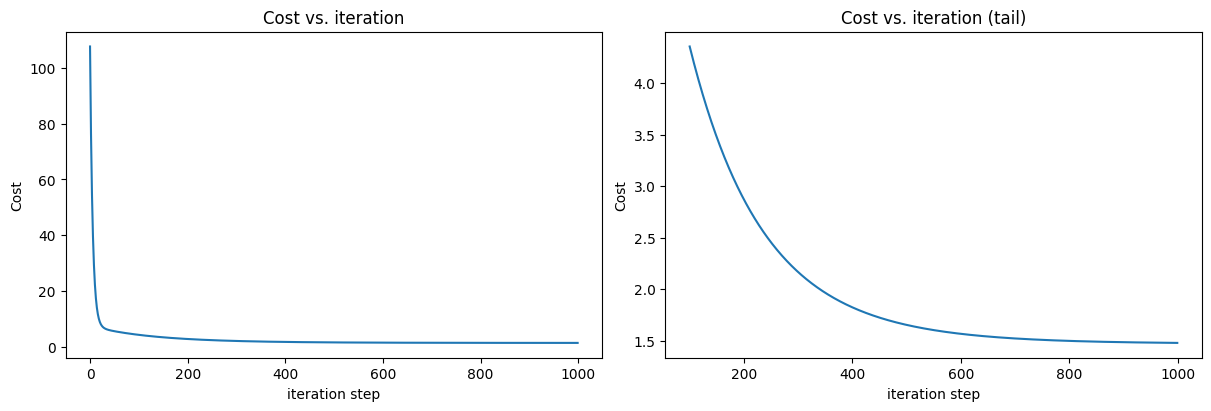

In [37]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [40]:
m,_ = X_scaled.shape 
result = [] # list store result of the predictions via the final weights and bias

for i in range(m):
    prediction = np.dot(X_scaled[i], w_final) + b_final
    target_value = Y[i]
    result.append({'prediction': prediction, 'target_value': target_value})

# Convert list to dataframe
result_df = pd.DataFrame(result)
result_df.head()

,prediction,target_value
0,21.524827,22.1
1,11.598093,10.4
2,10.681122,12.0
3,17.131426,16.5
4,15.286813,17.9


#### 5.1.2 Metrics

##### Mean Square Error
This metric measures how close the predictions are to the true target values. Mean Square Error or MSE formula is:
$$
MSE = \frac{1}{n}\sum_{i=1}^n(\mathbf{y}_i - \mathbf{\hat{y}}_i)^2
$$

In [53]:
def mse(predictions: np.ndarray, target_values: np.ndarray) -> float:
    """
    Calculate the MSE between predictions and target values

    Args:
        prediction (np.ndarray): _description_
        target_value (np.ndarray): _description_
        
    Returns:
    float: mse
    """
    mse = np.mean((predictions - target_values)**2)/len(predictions)
    return mse

mean_square_error = mse(result_df['prediction'], result_df['target_value'])
mean_square_error

0.014776657456842828

In [48]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


So the Sales is in the range of 1.6 to 27 (measures thousands of units), with an std of 5.28. The mse (the average of the squared difference between the actual and predicted sales) of our model is 0.01477. This means that the mse is relatively small compared to the overall variance in the sales.

##### RMSE (Root Mean Square Error)
Root Mean Square Error derive from MSE and its computed as:
$$
RMSE = \sqrt{MSE}
$$

In [55]:
rmse = np.sqrt(mean_square_error)
rmse

0.12155927548666465

RMSE of 0.12 shows on average, the model's predictions are off by 1.12 thousand units in sales.

##### MAE (Mean Absolute Error)
Mean Absolute Error is similar to MSE and RMSE, a popular metric that is robust to outliers. The formula is
$$
MAE = \frac{1}{n}\sum_{i=1}^n|\mathbf{y}_i - \mathbf{\hat{y}}_i|
$$

In [58]:
def mae(predictions: np.ndarray, target_values: np.ndarray) -> float:
    """
    Calculate the MSE between predictions and target values

    Args:
        prediction (np.ndarray): _description_
        target_value (np.ndarray): _description_
        
    Returns:
    float: mae
    """
    mae = (1/len(predictions)) * np.sum((predictions - target_values))
    return mae
     
    
mae(result_df['prediction'], result_df['target_value'])

0.01655921894249485

0.02 MAE, very small, which shows our model is performing very well.

##### Explained Variance ($R^2$)
Explained Variance, R-square, the coefficient of determination, is just the measure of the percentage of target variation that is explained by the model. In other words, it is the square correlation between the target values and the predicted target values.
$$
R^2 = \frac{\text{Variance Explained by the model}}{\text{Total Variance}}
$$
Unlike the other metrics, the higher the $R^2$, the better the model performance.

In [59]:
def r_squared(predictions: np.ndarray, target_values: np.ndarray) -> float:
    """
    Calculate the R-squared between predictions and target values.

    Args:
        predictions (np.ndarray): Predicted values.
        target_values (np.ndarray): Actual target values.
        
    Returns:
    float: R-squared value.
    """
    ss_total = np.sum((target_values - np.mean(target_value))**2)
    ss_residual = np.sum((target_values - predictions)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

r_squared(result_df['prediction'], result_df['target_value'])

0.9231773833754602

Our model gives a $R^2$ value of 0.923 which is very high.

### 5.2 Classification
The algorithm shows is logistic regression, or binary classification.

#### 5.2.1 Concept
The concept of classification is quite similar to regression, I will explain along with the code. The following information concept is from the Machine Learning Specialization (Ng, A., n.d.) course. The dataset used for this example is the diabetes dataset from Kaggle (n.d.).

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


I am dropping a few columns, since I just want to demonstrate the logistic algorithm. Also, I will  fill missing values with median, mode and encode the data.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data
X = df.drop("Outcome", axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Fit the scaling to the X
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.fit_transform(X_test)

##### Sigmoid function
The logistic regression formula is:
$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
The formula is not much different from regression formula, with the addition of $g$ which is the sigmoid function. The point of the sigmoid function is to transform the continuous output in a range between 0 and 1. The sigmoid function is defined as:
$$g(\mathbf{w}\cdot \mathbf{x} + b) = g(z) = \frac{1}{1+e^{-z}}$$

In [122]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    """
    Compute the sigmoid of z

    Args:
        z (np.ndarray): Input array

    Returns:
        np.ndarray: Sigmoid of input array
    """
    z = np.clip(z, -500,500)
    g = 1.0/(1.0 + np.exp(-z))
    return g

##### Cost function
The cost function for binary classification is called log-loss, unlike square error from regression. It is defined as:
$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] $$
where
- $m$ is the number of training data
- $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ or $loss(-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$ is the cost for a single data point.
    - Recall that $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is $g(z)$ or model's prediction, and $y^{(i)}$ is the labels.

Just remember that lower log loss means the model performs better.

In [123]:
def compute_cost(X: np.ndarray, y: np.ndarray, w: np.ndarray, b: float) -> float:
    """_summary_
    Compute the cost over all examples

    Args:
        X (np.ndarray (m,n)): training data
        y (np.ndarray (m,)): label
        w (np.ndarray (n,)): weight
        b (float): bias

    Returns:
        float: cost
    """
    m, n = X.shape
    z = X @ w + b
    predictions = sigmoid(z)
    
    # Log loss 
    cost = (1/m) * np.sum(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
    return cost

In [124]:
m, n = X_train.shape

# Compute the initial w and b
initial_w = 0.01 * (np.random.rand(n) - 0.5)
initial_b = 0.01
cost = compute_cost(X, Y, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.687


##### Gradient
The formula is 
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) 
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} 
$$
* m is the training examples
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label.

Although the formula looks similar to regression, the $f_{\mathbf{w},b}$ is different.

In [125]:
def compute_gradient(X: np.ndarray, y: np.ndarray, w: np.ndarray, b: float) -> list:
    """ Compute the gradient for logistic regression

    Args:
        X (np.ndarray (m,n)): training data
        y (np.ndarray): label
        w (np.ndarray): weights
        b (float): bias

    Returns:
        list: list containing dJdw and dJdb (the gradient cost of w and b)
    """
    m, n = X.shape
    
    # Initial set up of dj_dw and dj_db
    dj_dw = np.zeros(w.shape) # this is just `np.zeros(n)`
    dJ_db = 0.
    
    # sigmoid function
    z = X @ w + b
    predictions = sigmoid(z)
    
    # gradient
    dj_dw = 1/m * (predictions - y) @ X + 0/m * w # we don't use np.sum
    dJ_db = 1/m * np.sum(predictions - y)
    
    
    return dj_dw, dJ_db

In [126]:
dj_dw, dJ_db = compute_gradient(X, Y, initial_w, initial_b)
dj_dw, dJ_db

(Pregnancies                 -0.280213
 Glucose                     -5.537028
 BloodPressure               -0.051056
 SkinThickness               -1.032154
 Insulin                    -14.922899
 BMI                         -0.780749
 DiabetesPedigreeFunction    -0.024811
 Age                         -0.765927
 dtype: float64,
 0.017149075032566678)

##### Gradient Descent
An iterative process like with regression problems. A good indicator of the gradient descent working correctly is when the cost value is decreasing with each iteration.

In [127]:
def gradient_descent(X:np.ndarray, y:np.ndarray, w:np.ndarray, b:float, cost_function, compute_gradient, alpha:float, num_iters:int) -> list:
    """
    Perform batch gradient descent to learn theta (weights and bias). Updates theta by taking
    number of iterations gradient steps with learning rate alpha. 

    Args:
        X (np.ndarray (m,n)): training data
        y (np.ndarray (m,)): label 
        w (np.ndarray): initial weights
        b (float): initial bias
        cost_function (function): cost function output
        compute_gradient (function): compute gradient function output
        alpha (float): learning rate
        num_iters (int): number of iterations

    Returns:
        list: list containing w_in, b_in, J_history, w_history
    """
    
    # Lists to store the cost and weights of each iterations
    J_history = []
    w_history = []
    
    for i in range(num_iters):
        # Calculate the gradient
        dj_dw, dJ_db = compute_gradient(X, y, w, b)
        
        # Update the parameters
        w = w - alpha * dj_dw
        b = b - alpha * dJ_db
        
        # Save the cost J at each iteration
        if i < 100_000: # prevent resource exhaustion
            cost = cost_function(X, y, w, b)
            J_history.append(cost)
            
        # Print cost at 10 intervals
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history # return w and J history for graphing

In [128]:
np.random.seed(1)
w, b, J_history, _ = gradient_descent(X_train_scaled ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, 0.05, 10000)

Iteration    0: Cost     0.69   


Iteration 1000: Cost     0.49   
Iteration 2000: Cost     0.49   
Iteration 3000: Cost     0.49   
Iteration 4000: Cost     0.49   
Iteration 5000: Cost     0.49   
Iteration 6000: Cost     0.49   
Iteration 7000: Cost     0.49   
Iteration 8000: Cost     0.49   
Iteration 9000: Cost     0.49   
Iteration 9999: Cost     0.49   


##### Evaluating logistic regression
See how the model predicts on the training set. If $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$, if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$.

In [145]:
def predict(X: np.ndarray, w: np.ndarray, b: float) -> float:
    """
    Predict whether the label is 0 or 1 the final w and b. 

    Args:
        X (np.ndarray (m,n)): training data
        w (np.ndarray (n,)): weight
        b (float): bias

    Returns:
        float: The predictions using 0.5 threshold
    """
    # Initialize
    m, n = X.shape
    p = np.zeros(m)
    
    # Loop over each sample
    z = X @ w + b
    p = sigmoid(z)
    y_pred = np.where(p < 0.5, 0, 1)
    return y_pred, p

In [147]:
y_pred, y_pred_proba = predict(X_test_scaled, w, b)
print('Train Accuracy: %f'%(np.mean(y_pred == y_test) * 100))

Train Accuracy: 81.770833


#### 5.2.2 Metrics

##### Confusion matrix
Confusion matrix summarizes the prediction results via the number of correct and incorrect predictions with count values of each class.

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[116,   9],
       [ 26,  41]], dtype=int64)

Confusion matrix provides real performance of a classifier because it shows us the correct and incorrect count values of each label, meaning if our dataset is unbalanced, we will know that, unlike with accuracy where we do not know whether our data is unbalanced or not.

Here is what the output mean:
- The <span style="color:red">diagonal values</span> represent the elements where the **predicted classes** = **actual classes**.
- The <span style="color:red">off-diagonal values</span> represent wrong predictions.

![picture](1.png){width=550 height=300}

This picture shows the concept clearly, with **positive class** as **class 1** and **negative class** as **class 0**. There a few formulas derived from this.

- **Accuracy**: like I said already, accuracy is not useful for imbalance class problems, and we may need to use other metrics, but its a start.
$$
\text{accuracy} = \frac{TP + TN}{TP + FP + FN + TN}
$$

- **True Positive Rate** (TPR) or Recall or Sensitivity: correctly predicted positive. In other words, the fraction of TP over amount of positive samples (TP + FN).
$$
\text{recall} = \frac{TP}{TP + FN}
$$

- **False positive rate** (FPR): wrongly predicted positive. In other words, the fraction of FP over the amount of negative sample (FP + TN).
$$
\text{FPR} = \frac{FP}{FP + TN}
$$

An article on DataCamp from Navlani, A. (2019) provides us with more metrics.

- **Precision**: ratio of correctly predicted positive or TP over the total predicted positives (TP + FP).
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **F1**: combine precision and recall into a single metric, useful when class distribution is imbalanced. 
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **Support**: the number of actual occurrences of each class in the dataset.

In [140]:
df.Outcome.unique()

array([1, 0], dtype=int64)

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['no diabetes', 'diabetes']))

              precision    recall  f1-score   support

 no diabetes       0.82      0.93      0.87       125
    diabetes       0.82      0.61      0.70        67

    accuracy                           0.82       192
   macro avg       0.82      0.77      0.78       192
weighted avg       0.82      0.82      0.81       192



This shows us that 
- The model perform well with 0.82 accuracy.
- The model does better at predicting "no diabetes" (high recall of 0.93) compare to "diabetes" cases (lower recall of 0.61).
- F1-score of 0.7 for "diabetes" meaning the model performance for this label is weaker, which can be a concern if correctly identifying diabetes is crucial.

##### ROC curve
Receiver Operating Characteristic (ROC) curve is a plot that plot the TPR again the FPR. It shows us the trade-offs between benefits (TP) and costs (FP). This depends on the problem we are trying to solve, like how much can we afford FPR (Navlani, 2019).

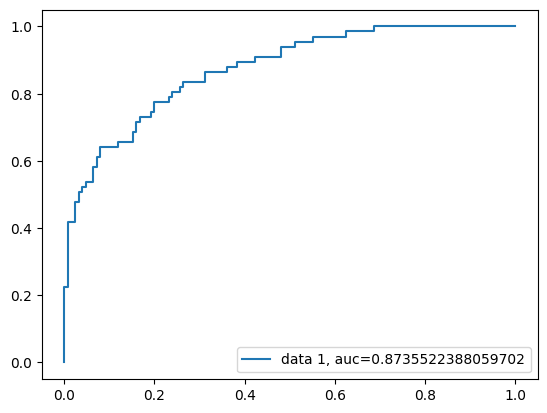

In [150]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

An auc score of 0.874 out of 1 indicate a good performance. If an auc score is 0.5, meaning it is no different from random guessing.

### 5.3 Partitioning the data 
There are limitation of only using 1 single training set, here are 3 better ways to split our data.

#### Sub-sampling
Random sub-sampling repeatedly partitions the data into random training and test sets in a specified ratio.

![picture](2.png){width=550 height=300}

The figure shows us that we train the model with each training set and estimate the accuracy using the corresponding test set. Finally, we average the accuracies to get an averaged estimate.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accuracies = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(10000))

    # Initialize StandardScaler
    standard_scaler = StandardScaler()

    # Fit the scaling to the X
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_test_scaled = standard_scaler.fit_transform(X_test)
    
    # Train the model
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Iteration {i+1}, Accuracy: {accuracy:.4f}")
    
# Calculate the mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

Iteration 1, Accuracy: 0.7857
Iteration 2, Accuracy: 0.7987
Iteration 3, Accuracy: 0.8442
Iteration 4, Accuracy: 0.7792
Iteration 5, Accuracy: 0.7792
Iteration 6, Accuracy: 0.7403
Iteration 7, Accuracy: 0.7857
Iteration 8, Accuracy: 0.7922
Iteration 9, Accuracy: 0.7987
Iteration 10, Accuracy: 0.8442
Mean Accuracy: 0.7948
Standard Deviation of Accuracy: 0.0292


#### Stratified Sampling
A splitting technique that ensures each class (or stratum) in the dataset is proportionate in both training and testing sets. In other words, the distribution of classes in training and testing sets mirrors the distribution of the original dataset. This technique is useful in imbalanced dataset. 

![picture](3.png){width=550 height=300}

In [153]:
# Check the distribution of classes
unique, counts = np.unique(y, return_counts=True)
print(f"Class distribution in the dataset: {dict(zip(unique, counts))}")

Class distribution in the dataset: {0: 500, 1: 268}


In [158]:
# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the distribution of classes in the training and testing sets
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print(f"Class distribution in the training set: {dict(zip(unique_train, counts_train))}")
print(f"Class distribution in the testing set: {dict(zip(unique_test, counts_test))}")

Class distribution in the training set: {0: 400, 1: 214}
Class distribution in the testing set: {0: 100, 1: 54}


#### Cross-validation
Cross-validation is one of the most popular splitting technique. The core idea is to partition the data into $k$ equal sized sub-samples. It is an iterative process where we leave one sub-sample out for the test set, and train on the rest of the sub-samples. 

![picture](4.png){width=550 height=300}

The picture shows us that we divide our data into 5 partitions. The first iteration trains on $s_2, s_3, s_4, s_5$ and test on $s_1$. The second iteration trains on $s_1, s_3, s_4, s_5$ and test on $s_2$. The same goes for 3 other iterations. After 5 iterations is completed, we take the average accuracy of the 5 times we test. 

In [6]:
from sklearn.model_selection import cross_val_score, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(10000))

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Fit the scaling to the X
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.fit_transform(X_test)

# Initialize model
model = LogisticRegression()

# Define the number of folds
k = 5

# Perform k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)

# Print the individual fold scores
print(f"Cross-validation scores for each fold: {cv_scores}")

# Print the mean and standard deviation of the scores
print(f"Mean cross-validation score: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation scores: {np.std(cv_scores):.4f}")

Cross-validation scores for each fold: [0.76422764 0.77235772 0.77235772 0.73170732 0.73770492]
Mean cross-validation score: 0.7557
Standard deviation of cross-validation scores: 0.0175


### 5.4 Finding the best hyperparameters
![picture](5.png){width=550 height=400}

The validation set is used to evaluate the given model and help fine-tune the model hyperparameters. The validation part is part of the training process, there are $3$ methods that automatically split our training data further into training data to train the given model, and validating data to validate and help choose the best hyperparmeters. 

Note that the following methods can include internal cross-validation. Instead of train/test cross-validate, we cross-validate the train/validate set.  

#### Exhaustive Search Methods
- **Grid Search**: the possible values of hyperparameters are defined in a few sets. These sets are then combined bia Cartesian product to form a multidimensional grid. Then we will try all the parameters in the grid to find the best ones. 
- **Random Search**: a variant of grid search where we try random points instead of all.

Although this algorithms run parallel and easy to implement. There are a few drawback:
- It can take lots of time and computational power if the hyperparameter search space is large.
- There is not guarantee of finding the local maxima. 

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model on the test set
test_score = grid_search.score(X_test_scaled, y_test)
print(f"Test Set Accuracy: {test_score:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Test Set Accuracy: 0.7727


#### Bayesian Optimization
Banerjee, P. (n.d.) on Kaggle provides the information for Bayesian Optimization.

Bayesian Optimization is a probabilistic model that yields better performance and requires less time than Grid Search. The model focuses of past evaluations when choosing the optimal set of hyperparameters, for that it is less time consuming. 

##### Bayesian Optimization Method
Bayesian Optimization is called Sequential **Model-Based Optimization (SMBO)**, where it builds a surrogate function that evaluates the input values based on expected improvement while focuses values that perform well in the past, and excludes poorer ones. 

There are several libraries support Bayesian optimization, like Spearmint (uses Gaussian Process surrogate), SMAC (uses Random Forest Regression), Hyperopt (uses Tree Parzen Estimator).

The demonstration uses **Hyperopt**.

##### 4 parts of Optimization Problem
Hyperopt has 4 parts to optimize a problem

1. **Objective Function**

The objective function in this case is to minimize the validation error in our model via hyperparameters. The value we want the maximize is accuracy, then the function should return the negative of that metric.

2. **Domain space**

Input values over which we want to search.

3. **Optimization algorithm**

Method to construct the surrogate objective function and choose the next value to evaluate.

4. **Results**

Score or value pairs the algorithm uses to build to model.

##### 1. Objective function
The goal is minimize the objective function. The set of input values are hyperparameters of GBm model. The output is real value to minimize (the cross-validation loss).

This is a objective function for the GBM model with 5-fold cross validation.

In [34]:
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK
import lightgbm as lgb

def objective_function(params):
    # Convert parameters to integers
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['num_leaves'] = int(params['num_leaves'])

    clf = lgb.LGBMClassifier(**params)
    score = cross_val_score(clf, X_train_scaled, y_train, cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}

The function returns a dictionary of values - loss and status. The loss key is the negative score derive from the cv mean score.

##### 2. Domain space
The space has probability distribution for each hyperparameter rather than discrete value. The algorithm will choose one value for each hyperparameter from this domain space. The initial space for the distributions is large, but we will refine it later.

In [35]:
from hyperopt import hp
import numpy as np

space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'n_estimators': hp.quniform('n_estimators', 5, 35, 1),
    'num_leaves': hp.quniform('num_leaves', 5, 50, 1),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
}

The domain distribution types in the space are:
- choice: categorical variables
- quniform: discrete uniform
- uniform: continuous uniform
- loguniform: continuous log uniform

##### 4. Result history
Hyperopt will track the results internally, we can use `Trial` object to return those results. We can also save this results in a csv file.

In [25]:
from hyperopt import Trials

trials = Trials()

In [17]:
from hyperopt import fmin, tpe
import numpy as np

# Define the number of evaluations
num_eval = 500

# Use the new random number generator
rng = np.random.default_rng(1)

# Run the optimization
best_param = fmin(objective_function, space, algo=tpe.suggest, max_evals=num_eval, trials=trials, rstate=rng)


### 5.5 Imbalance dataset
For classification dataset, there one label might have too many data while the other not so much. The machine learning models work best when the labels are roughly the same.

The issues with imbalanced dataset can be:
- Since the test data contains a few sample of the minority class, even a dumb classifier can get high accuracy. But this problem can be solved with other evaluation metrics.
- When random subsampling, the class proportion might not be maintained, but this can be solved via Stratified Sampling.

#### Solutions
We have 2 approaches, either to modify the data or improve the algorithm. 
##### Data level
- **Oversampling** the data from minority class
- **Undersampling** the data from majority class
##### Algorithmic level
- adjusting the costs
- adjusting the decision threshold

## Week 6: Linear model

### 6.1 Kernel trick and non-linear SVM 
![picture](6.png){width=700 height=250}

Sometimes, by transforming data points that are not linearly separate into a higher dimension, those data might be linearly separable. 

The information below is from Wilimitis, D. (2019).
#### Intro to Support Vector Classification (SVC)
SVC goal is to maximize the margin (the distance separating the closest pair of data points belonging to different classes). Those data points are called support vectors because they "support" the decision boundary. The decision boundary is the *optimal separating hyperplane*.

![picture](7.png){width=500 height=500}

#### The Kernel Trick
To apply to SVC, our data needs to be linear to be separated, that is where the Kernel Trick comes in, where it projects the original non-linear data into higher dimension space where data may become linearly separable (Wilimitis, 2019).

Bhavesh Bhatt (2020) provides a good tutorial on how to apply SVC in python.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [18]:
matplotlib_axes_logger.setLevel('ERROR')

In [19]:
zero_one_colourmap = ListedColormap(('red', 'green'))

##### Plotting Decision Boundary Function

In [43]:
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start=X_set['X1'].min() - 1, 
                                   stop=X_set['X1'].max() + 1, 
                                   step=0.01),
                         np.arange(start=X_set['X2'].min() - 1, 
                                   stop=X_set['X2'].max() + 1, 
                                   step=0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                               X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set.loc[y_set == j, 'X1'], X_set.loc[y_set == j, 'X2'],
                    c=(zero_one_colourmap)(i), label=j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()


##### Plotting 3D Plot

In [29]:
def plot_3d_plot(X, y):
  r = np.exp(-(X ** 2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X['X1'], X['X2'], r, c=y, s=100, cmap=zero_one_colourmap)
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('y')
  return ax

##### Reading the data

In [22]:
df = pd.read_excel("SVM_Data.xlsx")
df.head()

,X1,X2,Y
0,-0.364924,0.230728,1
1,-0.293515,-0.974130,0
2,0.470622,0.966409,0
3,-0.549030,0.869911,0
4,-1.072329,-0.195141,0


In [25]:
X = df.drop('Y', axis=1)
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

##### Plot the data

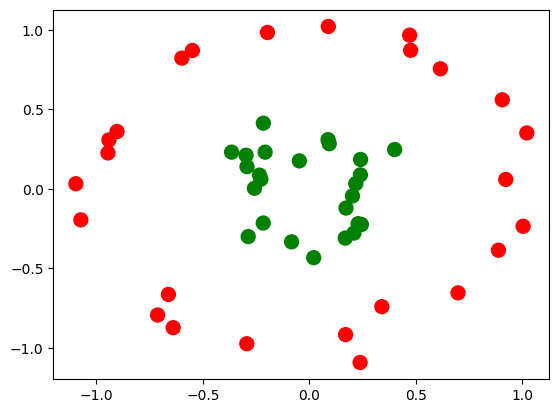

In [27]:
plt.scatter(X['X1'],X['X2'], c=y, s=100, cmap = zero_one_colourmap)
plt.show()

Green dot is 1, red dot is 0. We can see that we can not draw a single line to separate the classes.

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

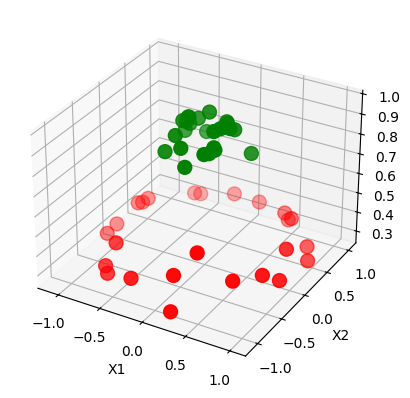

In [31]:
plot_3d_plot(X, y)

But if we plot it on a 3D space, we can now draw a linear line to separate the classes. This is where kernel trick comes in.

##### Non Linear SVM Classifier

In [33]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train.ravel())
y_pred = rbf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\tomde\AppData\Local\Temp\ipykernel_4736\1989455453.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rbf_classifier.fit(X_train, y_train.ravel())


1.0

In [37]:
confusion_matrix(y_pred, y_test)

array([[7, 0],
       [0, 6]], dtype=int64)

c:\Users\tomde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\tomde\AppData\Local\Temp\ipykernel_4736\3874166005.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set.loc[y_set == j, 'X1'], X_set.loc[y_set == j, 'X2'],


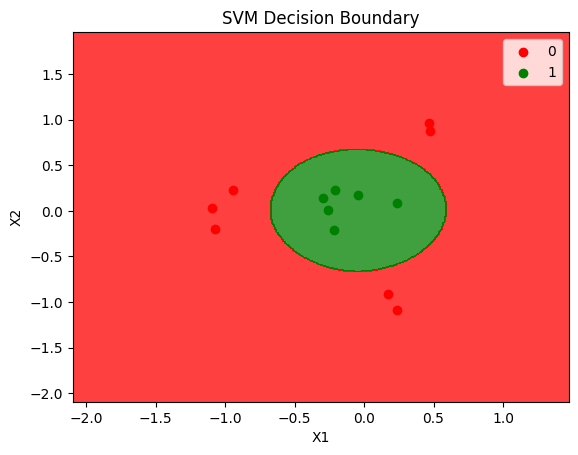

In [44]:
plot_decision_boundary(X_test, y_test, rbf_classifier)

### 6.2 Model complexity
Since I have already gone over the linear regression and logistic regression in week 5, I won't go over it again (the mathematical concept) in week 6.

Model complexity is the measure of how complex our model is.
Under-fitting means that our model is very simple. Over-fitting means our model is too complex and learn the noise of our data.

![picture](9.png){width=700 height=500}

This picture provides a good diagnose on the complexity of our model. The main thing we need to focus on is the train error and cross validation error. Our goal is to find the sweet spot where Risk = bias + variance + noise is the minimum.

Here are a few steps to try to find that sweet spot.

So we know that bias means underfit, variance means overfit, noise is the Irreducible error inherent in the data. The first thing we need to do is to choose a model family, like decision tree or neural network. Then we use k-fold cross-validation and calculate the model's error, which includes bias and variance components. Then we plot the bias-variance validation.
- **Training error**: typically decrease with model's complexity (lower bias, higher variance).
- **Validation error**: decreases initially but increase as the model becomes overfit (higher variance).

The sweet spot is where the validation error is minimized.

If our model is too complex, we can use **Regularisation** to control the model complexity. 

### 6.3 Regularised linear models
Regulariser is addition term of the loss function to avoid overfitting. It does not allow regression coefficients (or weights) to take excessively large value. The formula will now become:
$$
\text{minimize } \frac{1}{n}\sum_{i=1}^{n} L(y_i, \mathbf{x}^T_i\mathbf{w}) + \lambda \text{Regulariser}(\mathbf{w})
$$

There are 2 things we want our model to discourage. One is **high weights** because one small change in those features can lead to large changes in the prediction. Second is **irrelevant features**, so we want to discard those features.

There are 2 options.
- **Option 1** ($l_1$-norm): this option encourages 0 weights, this means discarding irrelevant data. 
$$
\text{Regulariser}(\mathbf{w}) = \sum_j |w_j| = ||\mathbf{w}||_1
$$

- **Option 2** ($l_2$-norm): penalises large weights
$$
\text{Regulariser}(\mathbf{w}) = \sum_j |w_j|^2 = ||\mathbf{w}||_2
$$

These 2 options are part of L1 and L2 methods.

1. **L1 Regularisation (LASSO)**

This is a regression analysis that shrinks some coefficient to zero to discard them.
$$
\text{minimize } \frac{1}{n}\sum_{i=1}^{n} L(y_i, \mathbf{x}^T_i\mathbf{w}) + \lambda_1 ||\mathbf{w}||_1
$$

2. **L2 Regularisation (Ridge)**

This is a regression analysis that prevents overfitting by shrinking coefficients but don't remove them.

$$
\text{minimize } \frac{1}{n}\sum_{i=1}^{n} L(y_i, \mathbf{x}^T_i\mathbf{w}) + \lambda_2 ||\mathbf{w}||_2
$$

Ridge is a special case of **Elastic Net** where $\lambda_1 = \lambda_2 =0$.

Elastic Net combines both LASSO and Ridge where it overcomes the LASSO's limit of selecting at most $n$ variables before it saturates. The formula for Elastic Net is:
$$
\text{minimize } \frac{1}{n}\sum_{i=1}^{n} L(y_i, \mathbf{x}^T_i\mathbf{w}) + \lambda_1 ||\mathbf{w}||_1 + \lambda_2 ||\mathbf{w}||_2
$$

The effect of Regularisation increases biases and reduces variance helps us choose the right trade-off, or the sweet spot where the validation error is minimized.

### 6.4 Feature selection with Regularised linear models
Lasso and Ridge are regularization techniques for learn models, and not applicable for non-linear model, though the concept of regularization can be extended to non-linear models. 

### 6.5 Regularised linear regression in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('poly_data.csv')
display(df.head())
display(df.info())

,y,x
0,1.065763,1.047198
1,1.006086,1.117011
2,0.695374,1.186824
3,0.949799,1.256637
4,1.063496,1.326450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       60 non-null     float64
 1   x       60 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


None

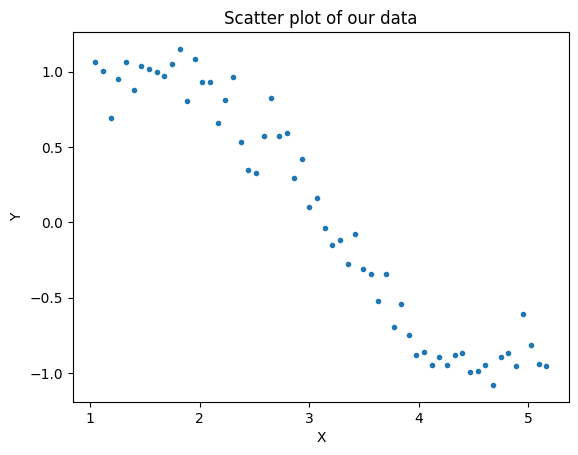

In [3]:
# Separate the data into features and response.
X = df['x']
y = df['y']

# Visualize the data
plt.plot(X, y, '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of our data')
plt.show()

In this step, we need to answer the questions
- is there correlation between $x$ and $y$?
- is the correlation linear or non-linear?

In our case, there seems to be a non-linear correlation. First, we will fit a linear regression model to see how it fits in this non-linear data.

In [4]:
X_train = X.values.reshape(-1, 1)
y_train = y.values

In [5]:
# Lets fit a linear regression model to this data
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_train)

Model MSE: 0.054671926649079085


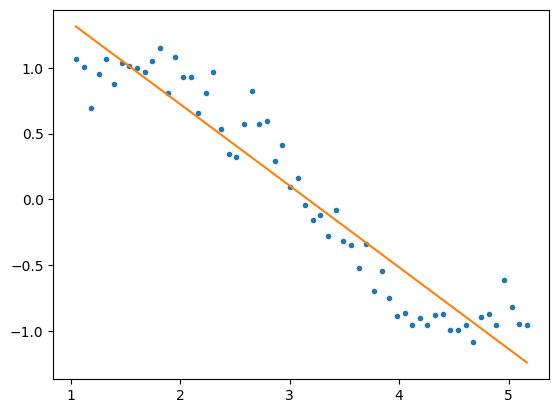

In [6]:
#Evaluate our model with mean square error
mse1 = np.mean((y_pred - y_train)**2)
print("Model MSE: {}".format(mse1))
plt.plot(df['x'], df['y'], '.', df['x'], y_pred, '-')
plt.show()

To get a better fit, we can use a polynomial regression. For this case, we can generate extra features $x$.

In [7]:
for i in range(2,6):
   colname = "x_%d"%i
   df[colname] = df.x**i

df.head()

,y,x,x_2,x_3,x_4,x_5
0,1.065763,1.047198,1.096623,1.148381,1.202581,1.259340
1,1.006086,1.117011,1.247713,1.393709,1.556788,1.738948
2,0.695374,1.186824,1.408551,1.671702,1.984016,2.354677
3,0.949799,1.256637,1.579137,1.984402,2.493673,3.133642
4,1.063496,1.326450,1.759470,2.333850,3.095735,4.106339


In [8]:
X = df.drop('y', axis=1)
y = df['y']

X_train = X.values
y_train = y.values

Let try to fit the model

Model MSE: 0.01697622659290237


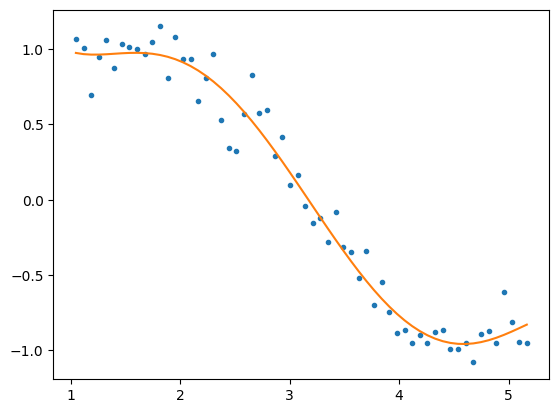

In [9]:
predictors = df.columns.values[1:]
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_pred2 = lr2.predict(X_train)

#Evaluate our model with mean square error
mse2 = np.mean((y_pred2 - y_train)**2)
print("Model MSE: {}".format(mse2))

plt.plot(df['x'], df['y'], '.', df['x'], y_pred2, '-')
plt.show()

In [10]:
print(lr2.coef_)

[-5.11776235  4.72461232 -1.92856217  0.33473526 -0.02065326]


Let's generate 15 features

In [11]:
for i in range(2,16):
   colname = "x_%d"%i
   df[colname] = df.x**i

df.head()

,y,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.065763,1.047198,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.006086,1.117011,1.247713,1.393709,1.556788,1.738948,1.942424,2.169708,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,0.695374,1.186824,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,0.949799,1.256637,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819709,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.063496,1.326450,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


In [12]:
X = df.drop('y', axis=1)
y = df['y']

X_train = X.values
y_train = y.values

Model MSE: 0.014355284174097836


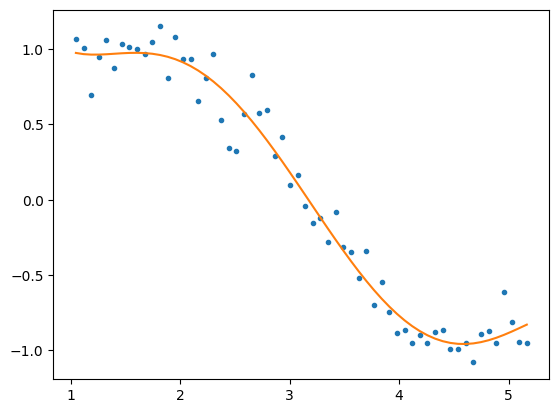

In [13]:
predictors = df.columns.values[1:]
lr3 = LinearRegression()
lr3.fit(X_train, y_train)
y_pred3 = lr3.predict(X_train)

#Evaluate our model with mean square error
mse3 = np.mean((y_pred3 - y_train)**2)
print("Model MSE: {}".format(mse3))

plt.plot(df['x'], df['y'], '.', df['x'], y_pred2, '-')
plt.show()

In [14]:
print(lr3.coef_)

[ 9.73631546e+02 -1.10259931e+03 -4.82712803e+01  1.01430307e+03
 -4.54615200e+02 -7.09004575e+02  1.12915621e+03 -7.95845556e+02
  3.49509726e+02 -1.03970195e+02  2.14211687e+01 -3.02511424e+00
  2.80270308e-01 -1.53750638e-02  3.79007734e-04]


Let's check each model.

In [15]:
print("MSE Simple LR: {}".format(mse1))
print("MSE Polynomial LR with power = 5:  {}".format(mse2))
print("MSE Polynomial LR with power = 15: {}".format(mse3))

MSE Simple LR: 0.054671926649079085
MSE Polynomial LR with power = 5:  0.01697622659290237
MSE Polynomial LR with power = 15: 0.014355284174097836


In [16]:
print("Coefficients Simple LR: {}".format(lr1.coef_))
print()
print("Coefficients Polynomial LR with power = 5:  {}".format(lr2.coef_))
print()
print("Coefficients Polynomial LR with power = 15: {}".format(lr3.coef_))

Coefficients Simple LR: [-0.61957457]

Coefficients Polynomial LR with power = 5:  [-5.11776235  4.72461232 -1.92856217  0.33473526 -0.02065326]

Coefficients Polynomial LR with power = 15: [ 9.73631546e+02 -1.10259931e+03 -4.82712803e+01  1.01430307e+03
 -4.54615200e+02 -7.09004575e+02  1.12915621e+03 -7.95845556e+02
  3.49509726e+02 -1.03970195e+02  2.14211687e+01 -3.02511424e+00
  2.80270308e-01 -1.53750638e-02  3.79007734e-04]


We can see that
- MSE decreases with increasing model complexity
- Size of coefficients increase with model complexity

This means we are putting a lot of emphasis on a few large coefficients or features.

#### $L_2$ Regularised linear regression
L2 puts restriction on feature weights from taking on very large values. The objective function of L2 is:

$$
\text{Objective function} = \text{Regression Loss Function} + \text{lambda} * \text{(sum of square of coefficients)} 
$$

When lambda = 0, the objective function is a simple linear regression, when lambda = infinity, coefficient will become zero. This means lambda will be values between 0 and infinity.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [24]:
from sklearn.linear_model import RidgeCV

lasso_cv = RidgeCV(alphas=np.logspace(-6, 1, 100), cv=5)
lasso_cv.fit(X_train_scaled, y_train)
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

Best alpha: 0.7390722033525775


c:\Users\tomde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.82829e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


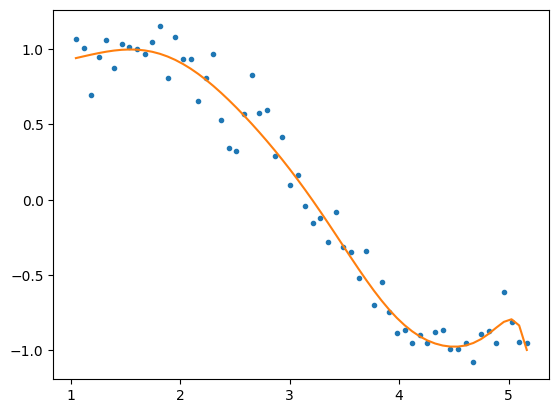


Model MSE: 0.015701999212003704

Model Coeff: [ 7.83485709e-03  1.99785770e-02  3.03460203e-02  2.98713758e-02
  1.26609049e-02 -1.33834760e-02 -2.31852868e-02 -4.78349408e-05
  1.94867521e-02 -1.16328302e-02  2.59364431e-03 -8.50744751e-05
 -6.32258826e-05  1.07433949e-05 -5.48810682e-07]


In [25]:
from sklearn.linear_model import Ridge

#call the ridge regression model with penalty (lambda) = 0.7390722033525775
ridgelr = Ridge(alpha=0.7390722033525775) # alpha in the function represents lambda

#Fit our data
ridgelr.fit(X_train, y_train)

# Do a prediction
y_pred4 = ridgelr.predict(X_train)

#Evaluate our model with mean square error
mse4 = np.mean((y_pred4 - y_train)**2)
plt.plot(df['x'], df['y'], '.', df['x'], y_pred4, '-')
plt.show()
print()
print("Model MSE: {}".format(mse4))
print()
print("Model Coeff: {}".format(ridgelr.coef_))

#### $L_1$ Regularised linear regression
L1 makes unimportant features to be zero.

In [27]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=np.logspace(-6, 1, 100), cv=5, max_iter=100000)
lasso_cv.fit(X_train_scaled, y_train)
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

c:\Users\tomde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006266450672398838, tolerance: 0.00232181565979582
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\tomde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009930625191225673, tolerance: 0.00232181565979582
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\tomde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01475851260122596, tolerance: 0.00232181565979582
  model = cd_fast.enet_coordinate_desc

Best alpha: 0.001788649529057435


c:\Users\tomde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13268303494094347, tolerance: 0.0023324241397638234
  model = cd_fast.enet_coordinate_descent_gram(


c:\Users\tomde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.954e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(


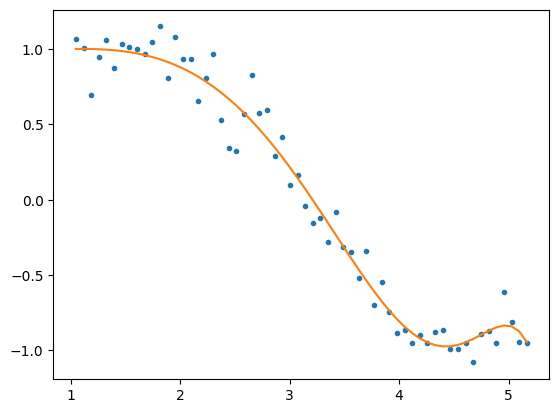


Model MSE: 0.016291175410678548

Model Coeff: [ 0.00000000e+00  4.35322678e-02  0.00000000e+00 -1.83832546e-02
 -2.50730227e-05  3.09973196e-04  3.85145543e-05  3.63052521e-06
  3.62094120e-07  5.42846677e-08  1.00204982e-08  1.31531145e-09
 -8.13443028e-11 -1.30999980e-10 -5.73667120e-11]


In [28]:
from sklearn.linear_model import Lasso

#call the lasso regression model with penalty (alpha) = 0.001788649529057435
# we also specify the max number of iterations as 10^5
lassoreg = Lasso(alpha=0.001788649529057435, max_iter=100000) # alpha in the function represents lambda 

#Fit our data
lassoreg.fit(X_train, y_train)

# Do a prediction
y_pred5 = lassoreg.predict(X_train)

#Evaluate our model with mean square error
mse5 = np.mean((y_pred5 - y_train)**2)

plt.plot(df['x'], df['y'], '.', df['x'], y_pred5, '-')
plt.show()
print()
print ("Model MSE: {}".format(mse5))
print()
print("Model Coeff: {}".format(lassoreg.coef_))

### 6.6 Logistic regression in python

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
train_data=pd.read_csv("train_wbcd.csv")
test_data=pd.read_csv("test_wbcd.csv")
train_data.head()

,Patient_ID,Diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,909410,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,...,14.91,19.31,96.53,688.9,0.10340,0.1017,0.06260,0.08216,0.2136,0.06710
1,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678
2,8912284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.33440,0.10170,0.1999,0.07127
3,90317302,B,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,...,11.38,15.65,73.23,394.5,0.13430,0.1650,0.08615,0.06696,0.2937,0.07722
4,914102,B,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,...,14.50,28.46,95.29,648.3,0.11180,0.1646,0.07698,0.04195,0.2687,0.07429


In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data=train_data.dropna()
test_data=test_data.dropna()
# Encode “diagnosis” to numerical values
train_data['Diagnosis'] = le.fit_transform(train_data['Diagnosis'].values)#[1 if each == 'M' else 0 for each in train_data['Diagnosis']]
test_data['Diagnosis'] = le.fit_transform(test_data['Diagnosis'].values)
X_train=train_data.iloc[:,2:]
y_train=train_data.iloc[:,1]
X_test=test_data.iloc[:,2:]
y_test=test_data.iloc[:,1]
print("Train: ",train_data.shape)
print("Test: ",test_data.shape)

Train:  (98, 32)
Test:  (19, 32)


#### Regularization using $L_1$ and $L_2$
- Penalty: can either be L1 or L2.
- C: inverse of regularization parameter lambda or alpha, the smaller the values, the stronger the regularizer.

We will try with lambda = 0.1, and C = 1/0.1

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

lambda_val = 0.1
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

#Evaluate our model
model_acc = accuracy_score(y_predict, y_test)
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))

Model Accuracy is: 0.8421052631578947
Model Coeff: [-2.09606231e-01 -1.36150529e+00 -1.93521967e-01 -2.79829408e+00
  1.95540780e-01  1.98827219e-02  1.35160464e-01  1.98270589e-01
  8.30472097e-02  4.02900688e-02  6.80496375e-04 -5.90643773e-02
 -5.65560243e-01  3.53530855e-01 -1.70851704e-01  1.67244250e-03
  3.13264070e-02  4.93750403e-02  1.26806220e-02 -4.95102566e-05
  2.74942670e-03 -1.62013320e+00  1.29460817e+00  1.59352200e+00
 -1.84163116e-02  3.88088236e-02  3.96018730e-01  5.25100507e-01
  1.65878430e-01  8.30877217e-02  2.55865001e-02]


c:\Users\tomde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Let's calculate the average accuracy over 500 runs of L1 and L2 regularised Logistic regression. 

In [12]:
def runLRmodel(trials, data, label, penalty_type, penalty_score):

   model_acc     = 0
   model_weights = np.zeros([1,31])

   for i in range(0,trials):
      Dtrain, Dtest = train_test_split(train_data, test_size=0.3)
      lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type, solver='liblinear', max_iter=100000)
      lr.fit(Dtrain.iloc[:,2:], Dtrain[label])
      y_predict = lr.predict(Dtest.iloc[:,2:])
      model_acc += accuracy_score(y_predict, Dtest[label])
      model_weights += np.append(lr.intercept_, lr.coef_)

   model_acc /= trials
   model_weights /= trials

   return np.round(model_acc, decimals=2), np.round(model_weights,decimals=2)

L2

In [13]:
lambda_vals = [.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
l2_acc = np.zeros(len(lambda_vals))
index = 0
#L2 regularization
for l in lambda_vals:
   l2_acc[index], w = runLRmodel(500,train_data, 'Diagnosis', 'l2', float(l))
   index += 1

print("Acc: {}".format(l2_acc))
# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
best_lambda = lambda_vals[max_index_l2]
print("Best Lambda: {}".format(best_lambda))

Acc: [0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.94 0.94 0.93 0.92]
Best Lambda: 0.0001


L1

In [14]:
alpha_vals = [.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
l1_acc = np.zeros(len(alpha_vals))
index = 0
#L2 regularization
for l in alpha_vals:
   l1_acc[index], w = runLRmodel(500,train_data, 'Diagnosis', 'l1', float(l))
   index += 1

print("Acc: {}".format(l1_acc))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Alpha: {}".format(best_alpha))

Acc: [0.95 0.95 0.96 0.96 0.96 0.96 0.96 0.96 0.93 0.92 0.92 0.91]
Best Alpha: 0.001


Plot the average model accuracy with respect the alpha or lambda.

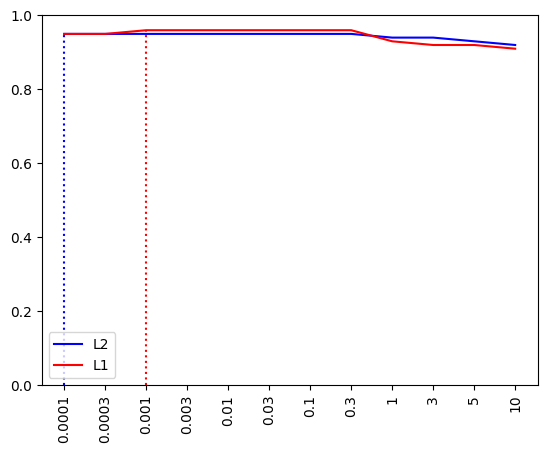

In [16]:
import matplotlib.pyplot as plt

#plot the accuracy curve
plt.plot(range(0,len(lambda_vals)), l2_acc, color='b', label='L2')
plt.plot(range(0,len(lambda_vals)), l1_acc, color='r', label='L1')
#replace the x-axis labels with penalty values
plt.xticks(range(0,len(lambda_vals)), lambda_vals, rotation='vertical')

#Highlight the best values of alpha and lambda
plt.plot((max_index_l2, max_index_l2), (0, l2_acc[max_index_l2]), ls='dotted', color='b')
plt.plot((max_index_l1, max_index_l1), (0, l1_acc[max_index_l1]), ls='dotted', color='r')

#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")
plt.show()

## Quiz
<!-- ![picture](quiz.png){width=1000 height=700} -->
<img src="quiz.png" width="1000" height="700" alt="picture">

## Reflection
Week 5, 6 have taught me the basic of supervised learning that is linear regression and logistic regression. It also shows me techniques to split data, metrics to test model, and how to diagnose the model.

## References
GeeksforGeeks (2024). Dataset for Linear Regression. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/dataset-for-linear-regression/ [Accessed 16 Aug. 2024].

Ng, A. (n.d.). Machine Learning Specialization. [online] DeepLearning.AI. Available at: https://www.deeplearning.ai/courses/machine-learning-specialization/.

Kaggle (n.d.). Pima Indians Diabetes Database. [online] www.kaggle.com. Available at: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

Navlani, A. (2019). Python Logistic Regression Tutorial with Sklearn & Scikit. [online] www.datacamp.com. Available at: https://www.datacamp.com/tutorial/understanding-logistic-regression-python.

Banerjee, P. (n.d.). Bayesian Optimization using Hyperopt. [online] kaggle.com. Available at: https://www.kaggle.com/code/prashant111/bayesian-optimization-using-hyperopt/notebook.

Wilimitis, D. (2019). The Kernel Trick. [online] Medium. Available at: https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f.

Bhavesh Bhatt (2020). Kernel Trick in Support Vector Machine (SVM). [online] YouTube. Available at: https://www.youtube.com/watch?v=aglNRO18R7g [Accessed 21 Aug. 2024].